### The Central Limit Theorem

- $\mu$ - population mean
- $\bar{x}$  - sample mean
- $\mu_{\bar{x}}$ - mean of the sample distribution
- $\sigma$ - standard deviation of population
- $s$ - standard deviation of sample
- $\sigma_{\bar{x}}$ - standard deviation of sample distribution (standard error)
- $n$ - sample size

Regarding The Law of Large Numbers, as $n$ goes up, the mean of the sample $\bar{x}$ gets closer and closer to the population mean $\mu$. For many samples, as an increases the mean of the sample distribution $\mu_{\bar{x}}$ will get close to the population mean $\mu$. So, if $n$ large enough $\mu_{\bar{x}} \approx \mu$.

Equation of a normal distribution:
$
z = \frac{x - \mu}{\sigma}
$

In a case of a sample distribution:
$
z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}
$

Where:
- $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$
- $\mu_{\bar{x}}$ can be replaced with $\mu$ for large $n$


$
z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
$

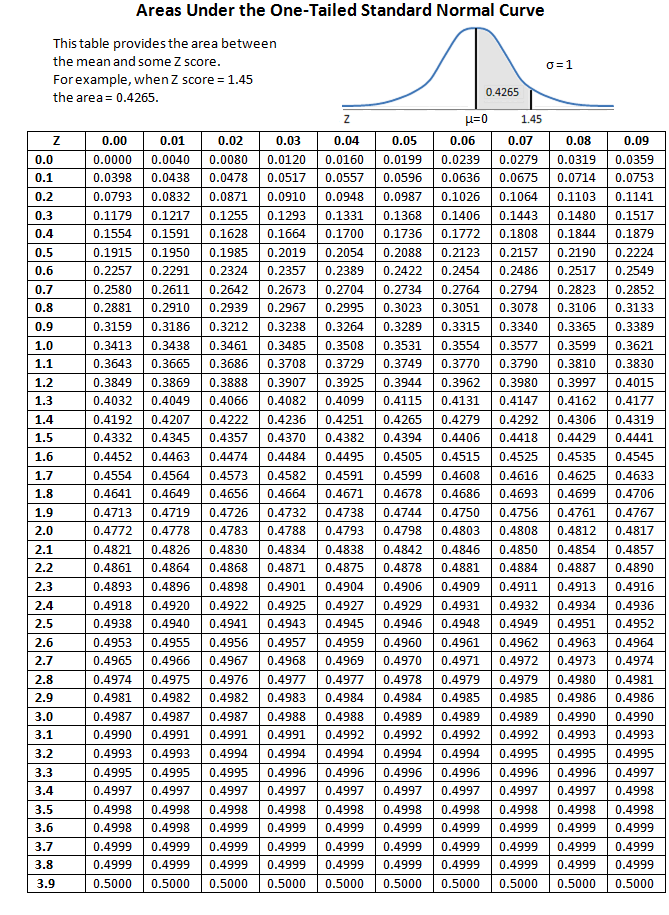

[z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf)

*[How to Use and Create a Z-Table (Standard Normal Table)](https://towardsdatascience.com/how-to-use-and-create-a-z-table-standard-normal-table-240e21f36e53)

___
*Example 1*

Suppose salaries at a very large corporation have a mean of 62,000 dollars and a standard deviation of 32,000 dollars. If 100 employees are randomly selected, what is the probability their average salary exceed 66,000 dollars?

*Solution*

Here we don't know distribution of the salaries. But regarding the CLT, for a large enough sample ($n$), the distribution of the sample mean will approach normal distribution.

$
\mu = 62000 \\
\sigma = 32000 \\
P(z > \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}) = P(z > \frac{(66000 - 62000)\sqrt{100}}{32000}) = P(z > 1.25)
$

Now, using Standard Normal Table (see above) find $P(z > 1.25):$
$\\ P(\bar{x} > 66000) = 0.5 - 0.3944 = 0.1056$

Or 10.6%

___
*Example 2*

A large elevator can transport a maximum of 9800 pounds. Suppose a load of cargo containing 49 boxes must be transported via the elevator. The box weight of this type of cargo follows a distribution with a mean of 205 pounds and a standard deviation of 15 pounds. Based on this information, what is the probability that all 49 boxes can be safely loaded into the freight elevator and transported?

*Solution*

Basically, the central limit theorem says, if $X$ is a random variable that belongs to any distribution with mean $\mu$ and standard deviation $\sigma$, then the sum of these random variables will converge to a normal distribution (provided n is big enough) with mean $\mu\cdot n$ and standard deviation $\sqrt{\sigma^2\cdot n}$. 

$z = \frac{\bar{x} - \mu}{\sigma} = \frac{\bar{x} - \mu\cdot n}{\sqrt{\sigma^2\cdot n}} = \frac{9800 - 10045}{105} = -2.33$

Now, using Standard Normal Table find $P(z \leq -2.33):$
$\\ P(\bar{x} \leq 9800) = 0.5 - 0.4901 = 0.0099$

*Code*

In [1]:
import math

x_bar = 9800
n = 49
mu = 205
sigma = 15

mu_z = n * mu 
sigma_z = math.sqrt(n) * sigma  # or math.sqrt(sigma**2 * n)

def cdf(x, mu, sigma):
    z = (x - mu) / sigma
    return 0.5 * (1 + math.erf(z / (math.sqrt(2))))

print(round(cdf(x_bar, mu_z, sigma_z), 4))

0.0098


___
*Example 3*

The number of tickets purchased by each student for the University X vs. University Y football game follows a distribution that has a mean of 2.4 and a standard deviation of 2.
A few hours before the game starts, 100 eager students line up to purchase last-minute tickets. If there are only 250 tickets left, what is the probability that all 100 students will be able to purchase tickets?

*Solution*

$\bar{x} = 250 \\
n = 100 \\
\mu = \mu * n \\
\sigma = \sqrt{\sigma^2\cdot n} \\
z = \frac{\bar{x} - \mu}{\sigma} = \frac{250 - 240}{\sqrt{400}} = 0.5$

Now, using Standard Normal Table find $P(z \leq 0.5):$
$\\ P(\bar{x} \leq 250) = 0.5 + 0.1915 = 0.6915$

*Code*

In [2]:
import math

x_bar = 250
n = 100
mu = 2.4
sigma = 2

mu_z = n * mu 
sigma_z = math.sqrt(n) * sigma

def cdf(x, mu, sigma):
    z = (x - mu) / sigma
    return 0.5 * (1 + math.erf(z / (math.sqrt(2))))

print(round(cdf(x_bar, mu_z, sigma_z), 4))

0.6915


___
*Example 4*

You have a sample of 100 values from a population with mean 500 and with standard deviation 80. Compute the interval that covers the middle 95% of the distribution of the sample mean; in other words, compute A and B such that P(A < x < B). Use the value of $z = 1.96$. Note that $z$ is the z-score.

*Solution*

The z-score is a factor telling you with what probability you land in an interval of z standard deviations away from the mean (in both directions) e.g.:
- with probability 68% you are 1 sd away from the mean (z-score = 1)
- with probability 95% you are within 2 sd from the mean
- with probability 99.7% you are within 3 sd ...
this is called the 68 95 99.7 rule.

Now the autor tells us to take 1.96 as z-score instead of 2 because 1.96 is a more exact z-value for 95%, comming from a z-table or inverse PDF function.

if you read the question carefully, you will notice he tells you the poulation mean and population standard deviation but asks you for the interval on the sample.

So you need to convert the population standard deviation into the sample standard deviation by dividing it by the square-root of the sample size (sqrt(100) = 10).

Further you need to know that the mean of the sample is the mean of the population.
Since you get the z-value your lower limit of the interval is $\mu - \sigma_{\bar{x}}\cdot z $, the uper limit is symetrical.

*Code*

In [3]:
sample = 100
mean = 500
sd = 50
interval = 0.95
z = 1.96

sd_sample = sd / sample**0.5
print(round(mean - sd_sample * z, 2))
print(round(mean + sd_sample * z, 2))

490.2
509.8


___
*Example 5*

The entrance exam scores of a certain univarcity has a mean of 74 and a standard deviation of 6.8. The exam scores follow a normal distribution.

1. If a student is selected at random, what is the probability that his exam score is less than 65?
2. If a sample of 50 students is selected at random, what is the probability that the mean exam score of this group is greater than 75?
3. What is the distribution for the mean exam score of 50 students?
4. Find the 80th perentile for the mean exam score of the 50 students.

*Solution*

1. Probability that randomly selected student exam score is less than 65.
$\\ \mu = 74 \\
\sigma = 6.8 \\
n = 1 \\
P(x < 65) = P(z < \frac{65 - 74}{6.8}) = P(z < -1.32) = 0.09342 = 9.342\%$

2. Probability that the mean exam score of the sample of 50 students is greater than 75.
$\\ n = 50 \\
P(\bar{x} > 75) = P(z > \frac{75 - 74}{\frac{6.8}{\sqrt{50}}}) = P(z > 1.04) = 0.5 - 0.3508 = 0.1492 = 14.92\%$

3. Distribution for the mean exam score of 50 students.
$\\ n = 50 \\
\bar{x} \sim N(\mu_{\bar{x}}, \frac{\sigma}{\sqrt{n}}) \\
\bar{x} \sim N(74, \frac{6.8}{\sqrt{50}}) = \sim N(74, 0.9617)$

4. 80th perentile for the mean exam score of the 50 students.
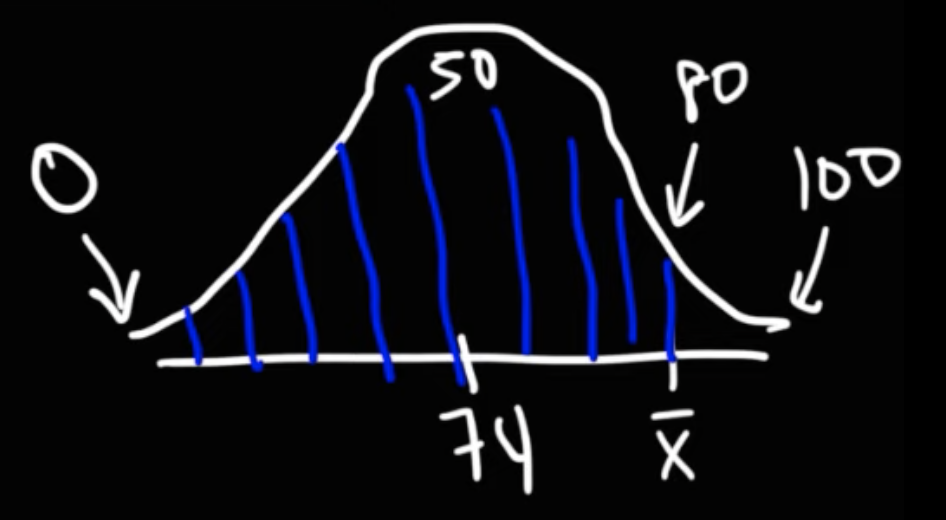
$\\ n = 50 \\
A_{L} = 0.80 \approx 0.79955:$
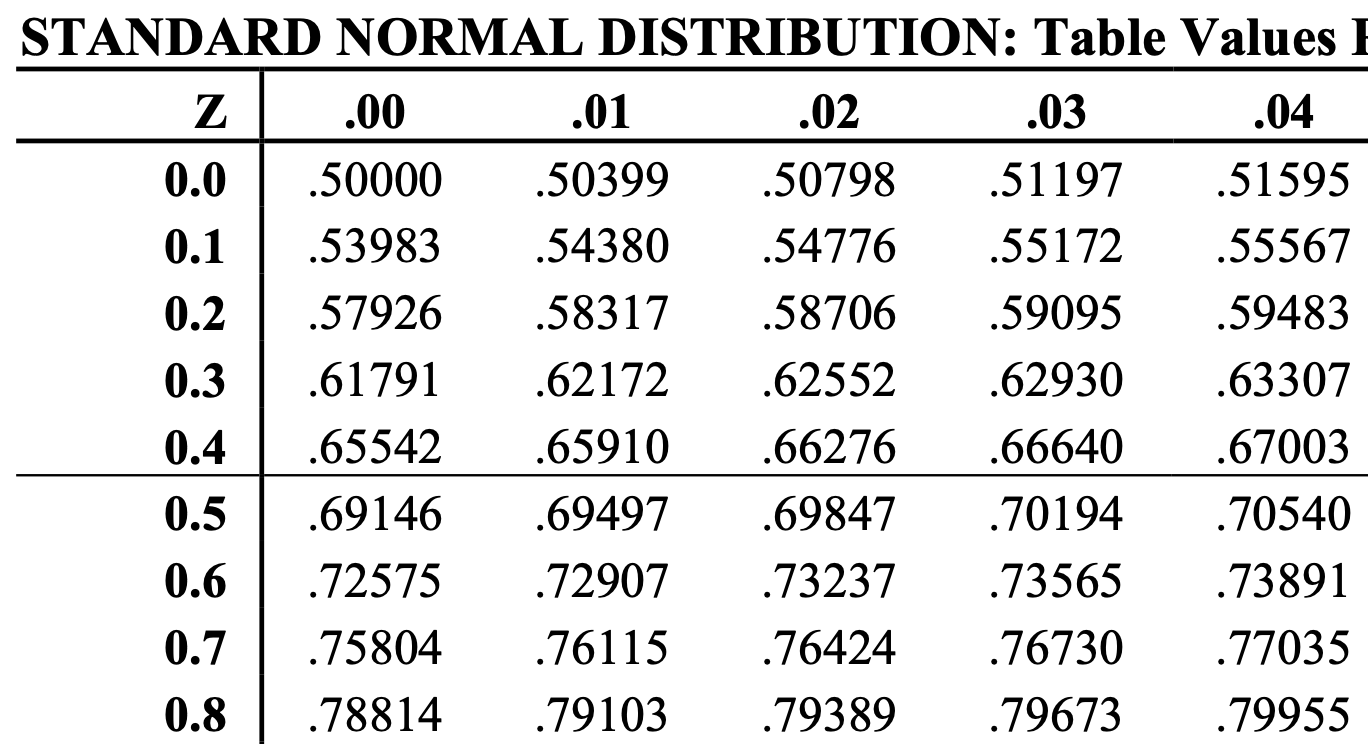
So, $z = 0.84$
$\\ \bar{x} = \mu + z\sigma_{\bar{x}} = 74 + 0.84\cdot \frac{6.8}{\sqrt{50}} = 74.81$

___
*Example 6*

The amount of carbs found in a snack bar produced by company XYZ follows a uniform distribution with a minimum of 21g and a maximum of 29g. A sample 0f 100 snack bars is taken for analysis.

1. Write the distribution for the mean amount of carbs found in 1 snack bar and calculate the mean and standard deviation.
2. What is the distribution for the mean amount of carbs in 100 snack bars?
3. What is the probability that a single snack bar has been between 24g and 26g of carbs?
4. Find the probability that the mean amount of carbs in 100 snack bars is between 24.9g and 25.1g of carbs.
5. What is the distribution for the sum of carbs found in 100 snack bars?
6. Find the probability that the sum of carbs found in 100 snack bars is greater than 2540.

*Solution*

1. Distribution for the mean amount of carbs found in 1 snack bar; mean and standard deviation.<br />
$
n = 1 \\
a = 21 \\
b = 29 \\ 
X \sim U(a, b) \to X \sim U(21, 29) \\
\mu = \frac{a + b}{2} = 25 \\
\sigma = \frac{b - a}{\sqrt{12}} = 2.3094
$<br />

2. Distribution for the mean amount of carbs in 100 snack bars.<br />
$
n = 100 \\
\mu = 25 \\
\sigma = 2.3094 \\
\bar{X} \sim N(\mu_{\bar{x}}, \frac{\sigma}{\sqrt{n}}) \\
\bar{X} \sim N(25, \frac{2.3094}{\sqrt{100}}) = N(25, 0.23094)
$<br />

3. Probability that a single snack bar has been between 24g and 26g of carbs.<br />
$
n = 1 \\
a = 21 \\
b = 29 \\
\mu = \frac{a + b}{2} = 25 \\
\sigma = \frac{b - a}{\sqrt{12}} = 2.3094 \\
P(24 < x < 26) = (d - c)\cdot f(x) = (d - c)\cdot \frac{1}{b - a} = \frac{26 - 24}{29 - 21} = 0.25 = 25\%
$<br />

4. Probability that the mean amount of carbs in 100 snack bars is between 24.9g and 25.1g of carbs.<br />
$
n = 100 \\
\mu = 25 \\
\sigma = 2.3094 \\
\sigma_{\bar{x}} = 0.23094 \\
P(24.9 < \bar{X} < 25.1) = P(\bar{X} < 25.1) - P(\bar{X} < 24.9) = \\
= P(z < \frac{25.1 - 25}{\sigma_{\bar{x}}}) - P(z < \frac{24.9 - 25}{\sigma_{\bar{x}}}) = P(z < 0.43) - P(z < -0.43) = 0.66640 - 0.33360 = 0.3328 = 33.28\%
$<br />

5. Distribution for the sum of carbs found in 100 snack bars.<br />
$
n = 100 \\
\mu = 25 \\
\sigma = 2.3094 \\
\sigma_{\bar{x}} = 0.23094 \\
\sum{X} \sim N(\mu_{\sum{x}}, \sigma_{\sum{x}}) \\
\mu_{\sum{x}} = \mu\cdot n = 25\cdot 100 = 2500 \\
\sigma_{\sum{x}} = \sigma_{\bar{x}}\cdot n = 23.094 \\
\sum{X} \sim N(2500, 23.094)
$<br />

6. Probability that the sum of carbs found in 100 snack bars is greater than 2540.<br />
$
n = 100 \\
\mu = 25 \\
\sigma = 2.3094 \\
\sigma_{\bar{x}} = 0.23094 \\
\mu_{\sum{x}} = \mu\cdot n = 25\cdot 100 = 2500 \\
\sigma_{\sum{x}} = \sigma_{\bar{x}}\cdot n = 23.094 \\
P(\sum{X} > 2540) = P(z > \frac{\sum{X} - \mu_{\sum{x}}}{\sigma_{\sum{x}}}) = \frac{2540 - 2500}{23.094} = P(z > 1.73) = 1 P(z < 1.73) = 1 - 0.95818 = 0.04182 = 4.182\%
$

___
*Example 7*

The length of time that a car lasts follows an exponential distribution with a mean of 7 years. A sample of 40 cars is reviewed for analysis.

1. What is the rate parameter ($\lambda$) and standard deviation ($\sigma$)?
2. What is the distribution for the mean length of time that the 40 cars will last?
3. What is the probability that the sample mean is less than 6.5 years?
4. Determine the IRQ for the mean length of time that the 40 cars will last.

*Solution*

1. Rate parameter and standard deviation.
For exponential distribution $\mu = \sigma$.<br />
$
\mu = 7 \\
\sigma = 7 \\
\lambda = \frac{1}{\mu} = \frac{1}{7} \\
$<br/>

2. Distribution for the mean length of time that the 40 cars will last.<br/>
$
\mu = 7 \\
\sigma = 7 \\
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{7}{\sqrt{40}} = 1.1068 \\
n = 40 \\
\bar{X} \sim N(\mu_{\bar{x}}, \sigma_{\bar{x}}) \\
\bar{X} \sim N(25, 1.1068)
$<br/>

3. Probability that the sample mean is less than 6.5 years.<br />
$
n = 40 \\
\mu = 7 \\
\sigma = 7 \\
\sigma_{\bar{x}} = 1.1068 \\
P(\bar{X} < 6.5) = P(z < \frac{6.5 - 7}{1.1068}) = P(z < -0.45) = 0.32636 = 32.636\%
$<br/>

4. IRQ for the mean length of time that the 40 cars will last.<br /><br />
$IQR = Q_{3} - Q_{1}$. The first quartile ($Q_{1}$) is the 25th percentile. The third quartile ($Q_{3}$) is the 75th percentile of the normal distribution (becase we have to find IRQ for sample). The mean ($\mu$) is the 50th percentil. So, we need to calculate $\bar{X}$ for $Q_{1}$ ($\bar{X_1}$) and $Q_{3}$ ($\bar{X_3}$).<br /><br />
$
\bar{X} = \mu + z\cdot \sigma_{\bar{x}}
$<br />
$A_{L} = 0.25 \to z = -0.675 \\
\bar{X_1} = 7 + (-0.675)\cdot 1.1068 = 6.253 \\
A_{L} = 0.75 \to z = 0.675 \\
\bar{X_3} = 7 + 0.67\cdot 1.1068 = 7.747
$<br />
$z = -0.675$ here because $z = 0.67 \to 0.25143$ and $z = 0.68 \to 0.24825$. The same works for $z = 0.675$.<br /><br />
$
IQR = Q_{3} - Q_{1} = 7.747 - 6.253 = 1.494
$